In [1]:
import pandas as pd
import numpy as np

/home/arsen/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
math_dataset = pd.read_csv('data/Maths.csv')
portuguese_dataset = pd.read_csv('data/Portuguese.csv')


In [3]:
math_dataset.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
portuguese_dataset.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [5]:
X_train_full = portuguese_dataset.copy()
y = X_train_full.G3
X_train_full.drop(columns=['G1', 'G2', 'G3'],axis=1, inplace=True)
X_test_full = math_dataset.copy()

In [6]:
alcohol_features = ['age', 'studytime', 'reason', 'failures', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic', 'famrel', 
                    'freetime', 'goout', 'Dalc', 'Walc', 'absences']

X_train_full = X_train_full[alcohol_features]
X_test_full = X_test_full[alcohol_features]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y, train_size=0.8, test_size=0.2)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
X_train.head()

,age,studytime,reason,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences
426,15,1,course,0,yes,no,no,yes,yes,no,5,4,4,2,3,4
241,17,2,reputation,0,yes,no,no,yes,yes,no,5,3,3,1,3,0
416,17,2,reputation,0,yes,no,no,yes,yes,no,4,4,4,1,2,10
604,18,2,course,1,no,no,no,no,no,no,4,4,2,1,2,2
16,16,3,reputation,0,yes,no,yes,yes,yes,no,3,2,3,1,2,10


In [9]:
X_train.columns

Index(['age', 'studytime', 'reason', 'failures', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'absences'],
      dtype='object')

In [10]:
X_train_full

,age,studytime,reason,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences
0,18,2,course,0,no,no,no,yes,no,no,4,3,4,1,1,4
1,17,2,course,0,yes,no,no,yes,yes,no,5,3,3,1,1,2
2,15,2,other,0,no,no,no,yes,yes,no,4,3,2,2,3,6
3,15,3,home,0,yes,no,yes,yes,yes,yes,3,2,2,1,1,0
4,16,2,home,0,yes,no,no,yes,no,no,4,3,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,3,course,1,no,no,yes,yes,yes,no,5,4,2,1,2,4
645,18,2,course,0,yes,no,no,yes,yes,no,4,3,4,1,1,4
646,18,2,course,0,no,no,yes,yes,no,no,1,1,1,1,1,6
647,17,1,course,0,no,no,no,yes,yes,no,2,4,5,3,4,6


In [11]:
import missingno as msno

<AxesSubplot:>

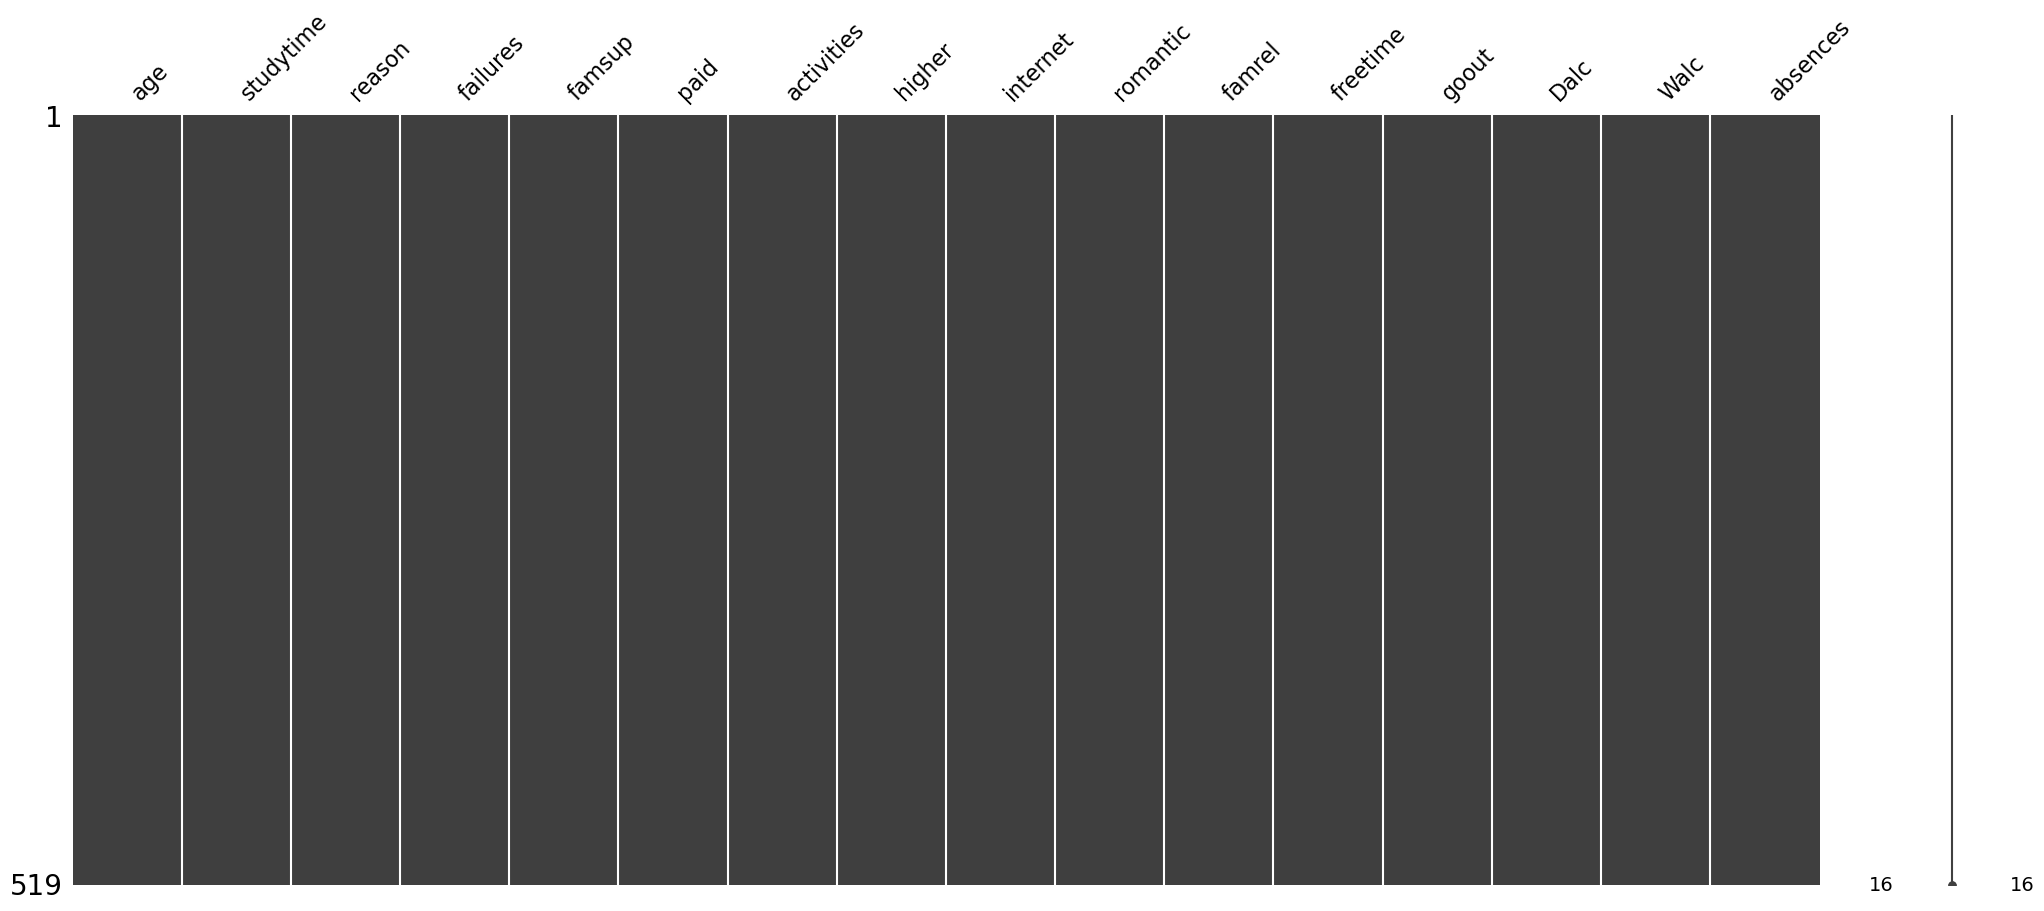

In [12]:
msno.matrix(X_train)

In [13]:
X_train.dtypes

age            int64
studytime      int64
reason        object
failures       int64
famsup        object
paid          object
activities    object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
absences       int64
dtype: object

In [14]:
from sklearn.preprocessing import OrdinalEncoder

bool_cols = ['famsup', 'paid', 'activities', 'higher', 'internet', 'romantic']
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

encoder = OrdinalEncoder()

label_X_train[bool_cols] = encoder.fit_transform(label_X_train[bool_cols])
label_X_valid[bool_cols] = encoder.transform(label_X_valid[bool_cols])
label_X_train

,age,studytime,reason,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences
426,15,1,course,0,1.0,0.0,0.0,1.0,1.0,0.0,5,4,4,2,3,4
241,17,2,reputation,0,1.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,3,0
416,17,2,reputation,0,1.0,0.0,0.0,1.0,1.0,0.0,4,4,4,1,2,10
604,18,2,course,1,0.0,0.0,0.0,0.0,0.0,0.0,4,4,2,1,2,2
16,16,3,reputation,0,1.0,0.0,1.0,1.0,1.0,0.0,3,2,3,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,20,2,course,0,1.0,1.0,1.0,0.0,1.0,1.0,1,2,3,1,2,8
286,17,1,course,0,0.0,0.0,0.0,1.0,1.0,0.0,4,4,2,2,4,0
546,17,2,course,0,1.0,0.0,0.0,1.0,1.0,0.0,5,2,5,1,1,0
92,16,2,home,0,1.0,0.0,0.0,1.0,0.0,0.0,3,3,3,2,3,0


In [15]:
X_train = label_X_train.copy()
X_valid = label_X_valid.copy()

In [16]:
from sklearn.preprocessing import OneHotEncoder

OH_cols = ['reason']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[OH_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[OH_cols]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

num_X_train = X_train.drop(OH_cols, axis=1)
num_X_valid = X_valid.drop(OH_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

OH_X_train
                          

/home/arsen/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,studytime,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,0,1,2,3
426,15,1,0,1.0,0.0,0.0,1.0,1.0,0.0,5,4,4,2,3,4,1.0,0.0,0.0,0.0
241,17,2,0,1.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,3,0,0.0,0.0,0.0,1.0
416,17,2,0,1.0,0.0,0.0,1.0,1.0,0.0,4,4,4,1,2,10,0.0,0.0,0.0,1.0
604,18,2,1,0.0,0.0,0.0,0.0,0.0,0.0,4,4,2,1,2,2,1.0,0.0,0.0,0.0
16,16,3,0,1.0,0.0,1.0,1.0,1.0,0.0,3,2,3,1,2,10,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,20,2,0,1.0,1.0,1.0,0.0,1.0,1.0,1,2,3,1,2,8,1.0,0.0,0.0,0.0
286,17,1,0,0.0,0.0,0.0,1.0,1.0,0.0,4,4,2,2,4,0,1.0,0.0,0.0,0.0
546,17,2,0,1.0,0.0,0.0,1.0,1.0,0.0,5,2,5,1,1,0,1.0,0.0,0.0,0.0
92,16,2,0,1.0,0.0,0.0,1.0,0.0,0.0,3,3,3,2,3,0,0.0,1.0,0.0,0.0


In [17]:
X_train = OH_X_train.copy()
X_valid = OH_X_valid.copy()

In [18]:
X_train

,age,studytime,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,0,1,2,3
426,15,1,0,1.0,0.0,0.0,1.0,1.0,0.0,5,4,4,2,3,4,1.0,0.0,0.0,0.0
241,17,2,0,1.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,3,0,0.0,0.0,0.0,1.0
416,17,2,0,1.0,0.0,0.0,1.0,1.0,0.0,4,4,4,1,2,10,0.0,0.0,0.0,1.0
604,18,2,1,0.0,0.0,0.0,0.0,0.0,0.0,4,4,2,1,2,2,1.0,0.0,0.0,0.0
16,16,3,0,1.0,0.0,1.0,1.0,1.0,0.0,3,2,3,1,2,10,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,20,2,0,1.0,1.0,1.0,0.0,1.0,1.0,1,2,3,1,2,8,1.0,0.0,0.0,0.0
286,17,1,0,0.0,0.0,0.0,1.0,1.0,0.0,4,4,2,2,4,0,1.0,0.0,0.0,0.0
546,17,2,0,1.0,0.0,0.0,1.0,1.0,0.0,5,2,5,1,1,0,1.0,0.0,0.0,0.0
92,16,2,0,1.0,0.0,0.0,1.0,0.0,0.0,3,3,3,2,3,0,0.0,1.0,0.0,0.0


In [48]:
from linear.linear_regression import LinearRegression

our_linear_regression = LinearRegression(n_estimators=100, learning_rate=0.01)
m,b = our_linear_regression.fit(X_train, y_train, 14)

result = our_linear_regression.predict(X_valid)

In [36]:
type(result.index.to_numpy())

numpy.ndarray

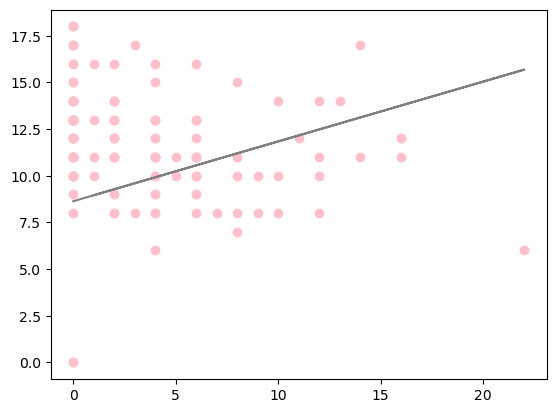

In [55]:
import matplotlib.pyplot as plt
plt.scatter(X_valid.absences, y_valid, color='pink')
plt.plot(X_valid.absences.to_numpy(), result.values, color='gray')
plt.show()